In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1

In [17]:
K = 15 # capacity of a shuttle if it is dispatched
env = [1,2,3,4,5] # A random variable giving the number of customers arriving during time interval t
Cf = 100 #The cost of dispatching a shuttle
Ch = 2 #The cost per customer left waiting per time period.
S = list(range(201)) 
gamma = 0.95 #discount rate
stateMax = 200 
unif_dist = 1/len(env)


In [111]:
def getReward(s, a, Cf, Ch):
    #a -> dispatch
    c = (a*Cf) + Ch*max(s-a*K, 0)
    return -c

def getNextState(s,a,K,Arr,stateMax):
    #new arrivals 
    s_prime = min(s + Arr, stateMax)    
    #action
    s_prime = s_prime - a * min(K, s_prime)
    return s_prime

def getEV(s, a, K, stateMax, env, unif_dist, V_t1):
    states = [getNextState(s, a, K, Arr, stateMax) for Arr in env]
    values = [unif_dist* V_t1[s] for s in states]
    ev = sum(values)
    return ev

### A) Enumeration

In [112]:
def enumeration(T):
    V_t1 = np.zeros(201)
    V_t = np.zeros(201)
    for t in range(T, -1, -1):       
        for s in S:            
            V_t[s] = max([getReward(s, a, Cf, Ch) 
                          + gamma * getEV(s, a, K, stateMax, env, unif_dist, V_t1) for a in [0,1]])
        V_t1 = V_t
    return V_t

Text(0.5,1,'Enumeration Optimal Value')

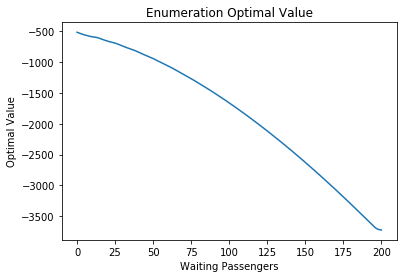

In [113]:
Vt = enumeration(500)
plt.plot(Vt)
plt.xlabel("Waiting Passengers")
plt.ylabel("Optimal Value")
plt.title("Enumeration Optimal Value")

### B) Value iteration

In [200]:
V_t1 = np.zeros(201)
V_t = np.zeros(201)
def valueIter(delta, theta):
    while delta > theta:
        V_t1 = V_t.copy()
        for s in S:
            V_t[s] = max([getReward(s, a, Cf, Ch) 
                              + gamma * getEV(s, a, K, stateMax, env, unif_dist, V_t1) for a in [0,1]])
        delta = min(delta,max([V_t1[s]-V_t[s] for s in S]))
    return V_t
    

Text(0.5,1,'Enumeration Optimal Value')

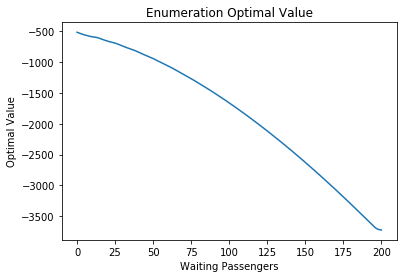

In [201]:
theta = 1e-5
delta = 1 
Vt = valueIter(delta,theta)
plt.plot(Vt)
plt.xlabel("Waiting Passengers")
plt.ylabel("Optimal Value")
plt.title("Enumeration Optimal Value")

## C) Policy iteration

In [217]:
def policyIter(delta, theta):
    V_t = np.zeros(201)
    policy = [np.random.randint(2) for s in S]
    policy_new = [np.random.randint(2) for s in S]
    bestAction = [None for s in S]
    c = 0
    while True:
        c = c+1
        print(c,"th loop")
        #policy evaluation
        while delta > theta:
            V_t1 = V_t.copy()
            for s in S:
                EVs = [getReward(s, a, Cf, Ch) 
                                      + gamma * getEV(s, a, K, stateMax, env, unif_dist, V_t1) for a in [0,1]]
                V_t[s] = EVs[policy[s]]
#                 print("rewards: ", EVs )
#                 print("argMax: ",np.argmax(EVs) )
                bestAction[s] = np.argmax(EVs)
            delta = min(delta,max([V_t1[s]-V_t[s] for s in S])) 
        
        policy_new = bestAction.copy()
#         print("new policy is: ", policy_new)
        #improve policy
        if all([policy_new[s] == policy[s] for s in S]):
            return policy
        else:
            policy = policy_new.copy()
    

In [218]:
delta = 1
theta = 1e-5
policy = policyIter(delta,theta)

1 th loop
2 th loop


Text(0.5,1,'Policy vs waiting passaengers')

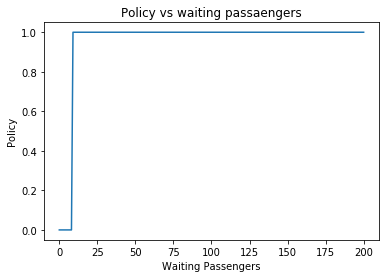

In [221]:
plt.plot(policy)
plt.xlabel("Waiting Passengers")
plt.ylabel("Policy")
plt.title("Policy vs waiting passaengers")

# Question 2

In [247]:
#All possible arrivals in term of type:number
arrivals = {x: env for x in Ch}
keys, values = zip(*arrivals.items())
all_arrs = [dict(zip(key, v)) for v in itertools.product(*value)]

In [238]:
def createState(cap, arr_cap):
    S = []
    V_t1 = {}
    V_t = {}
    curPolicy = {}
    newPolicy = {}
    for state1 in range(0, cap + 1):
        for state2 in range(0, cap + 1):
            for state3 in range(0, cap + 1):
                for state4 in range(0, cap+1):
                    for state5 in range(0, cap+1):
                        S.append([state1, state2, state3, state4, state5])
                        V_t1[(state1, state2, state3, state4,state5)] = 0
                        V_t[(state1, state2, state3, state4,state5)] = 0
                        curPolicy[(state1, state2, state3, state4,state5)] = np.random.randint(2)
                        curPolicy[(state1, state2, state3, state4,state5)] = np.random.randint(2)
    env = []
    for env1 in range(1, maxArrivals + 1):
        for env2 in range(1, maxArrivals + 1):
            for env3 in range(1, maxArrivals + 1):
                for env4 in range(1，maxArrivals + 1):
                    for env5 in range(1, maxArrivals + 1):
                        E.append([env1, env2, env3,env4, env5])
                        
    return S, V_t1, V_t, curPolicy, newPolicy, env
    

In [ ]:
def getReward(s, a, Cf, Ch, cap):
    #a -> dispatch
    c = (a*Cf) + sum(Ch*getNextState(s, a, K, cap, env))
    return -c

def getNextState(s,a,K,cap,env):
    #new arrivals 
    s_prime = s.copy()
    s_prime = np.clip(np.add(s_prime,env),0,cap)
    #action
    if a == 1:
        for i in range(len(s_prime), -1, -1):
            s_prime[i] =  max(s_prime[i] - K, 0)
            K = K - (s[i] - s_prime[i])
    return s_prime

def getEV(s, a, K, cap, env, unif_dist, V_t1):
    states = [getNextState(s,a,K,cap,env) for e in env]
    values = [(1/len(env))* V_t1[s] for s in states]
    ev = sum(values)
    return ev

### a) Enumeration

In [ ]:
def enumeration(T):
    for t in range(T, -1, -1):
        for s in S:
            V_t[s] = max([getReward(s, a, Cf, Ch) 
                          + gamma * getEV(s, a, K, stateMax, env, unif_dist, V_t1) for a in [0,1]])
        V_t1 = V_t.copy()
    

In [ ]:
K = 30 
Cf = 100 
Ch = [1,1.5,2,2.5,3] 
gamma = 0.95 
cap = 100
arr_cap = 5

S, V_t1, V_t, curPolicy, newPolicy, env = createState(cap, arr_cap)
Vt = enumeration(T)

### b) Value Iteration

In [ ]:
def valueIter(delta, theta):
    while delta > theta:
        V_t1 = V_t.copy()
        for s in S:
            V_t[s] = max([getReward(s, a, Cf, Ch) 
                              + gamma * getEV(s, a, K, stateMax, env, unif_dist, V_t1) 
        delta = min(np.abs(V_k1[s] - V_k[s]), delta)
    return V_t

### c) Policy Iteration

In [ ]:
def policyIteration(theta, delta):
    while True:
        while delta > theta:
            for s in S:
                # Get the action based on the policy
                a = oldPolicy[tuple(s)]
                reward = getReward(c_f, c_h, a, s, K, stationCapacity)
                V_k1[tuple(s)] = getExpectedValue(E, s, S, a, K, stationCapacity, V_k, reward, d)
                if np.abs(V_k1[tuple(s)] - V_k[tuple(s)]) > delta:
                    delta = np.abs(V_k1[tuple(s)] - V_k[tuple(s)])
            print(i, delta)
            V_k = V_k1.copy()
            i += 1
        # Policy improvement
        for s in S:
            expectedValues = []
            for a in A:
                reward = getReward(c_f, c_h, a, s, K, stationCapacity)
                expectedValues.append(getExpectedValue(E, s, S, a, K, stationCapacity, V_k, reward, d))
            bestAction = np.argmax(expectedValues)
            newPolicy[tuple(s)] = bestAction
        if newPolicy != oldPolicy:
            oldPolicy = newPolicy.copy()
            delta = 2
            V_k = dict.fromkeys(V_k, 0)
            V_k1 = dict.fromkeys(V_k1, 0)
        else:
            changing = False
    plot_values = []
    for i in range(stationCapacity + 1):
        plot_values.append(newPolicy[(1,1,1,1,i)])
    plt.plot(plot_values)
    return newPolicy

In [ ]:
def policyIter(delta, theta):
    V_t = np.zeros(201)
    policy = [np.random.randint(2) for s in S]
    policy_new = [np.random.randint(2) for s in S]
    bestAction = [None for s in S]
    c = 0
    while True:
        c = c+1
        print(c,"th loop")
        #policy evaluation
        while delta > theta:
            V_t1 = V_t.copy()
            for s in S:
                EVs = [getReward(s, a, Cf, Ch) 
                                      + gamma * getEV(s, a, K, stateMax, env, unif_dist, V_t1) for a in [0,1]]
                V_t[s] = EVs[policy[s]]
#                 print("rewards: ", EVs )
#                 print("argMax: ",np.argmax(EVs) )
                bestAction[s] = np.argmax(EVs)
            delta = min(delta,max([V_t1[s]-V_t[s] for s in S])) 
        
        policy_new = bestAction.copy()
#         print("new policy is: ", policy_new)
        #improve policy
        if all([policy_new[s] == policy[s] for s in S]):
            return policy
        else:
            policy = policy_new.copy()
    